# Storytelling: Explorando e Modelando os Dados de Preço de Venda de Imóveis


# # Introdução

O objetivo desta análise é entender melhor os fatores que influenciam os preços de venda das casas e desenvolver modelos preditivos para estimar esses preços. Para isso, seguimos várias etapas de análise exploratória de dados (EDA) e modelagem.

# Carregamento e Visualização dos Dados

Começamos carregando os dados do arquivo train.csv e visualizando suas primeiras linhas para entender a estrutura do dataframe. Observamos que os dados contêm várias colunas, cada uma representando uma característica diferente das casas.

In [2]:
import pandas as pd
# Carregar os dados
train_data = pd.read_csv('train.csv')
# Visualizar as primeiras linhas do dataframe
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Verificação de Valores Ausentes

Identificamos que algumas colunas possuem muitos valores ausentes. As colunas PoolQC, MiscFeature, Alley, Fence e FireplaceQu apresentaram o maior número de valores ausentes.

In [3]:
# Verificar valores ausentes
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

# Estatísticas Descritivas

Analisamos estatísticas descritivas das variáveis numéricas para obter insights sobre sua distribuição e características principais. Observamos que variáveis como SalePrice, OverallQual, GrLivArea, GarageCars e GarageArea apresentaram grande variação, sugerindo sua importância na previsão dos preços.

In [4]:
# Estatísticas descritivas das variáveis numéricas
desc_stats = train_data.describe()
desc_stats


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Análise de Correlação

Calculamos a correlação entre as variáveis numéricas e SalePrice para identificar quais variáveis têm maior influência sobre o preço de venda. As variáveis OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt e YearRemodAdd mostraram correlações positivas significativas com SalePrice.

In [6]:
numeric_cols = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
if 'SalePrice' in correlation_matrix.columns:
    saleprice_correlation = correlation_matrix["SalePrice"].sort_values(ascending=False)
    print(saleprice_correlation)
else:
    print("A coluna 'SalePrice' não está presente no dataframe.")

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [28]:
# Selecionar apenas colunas numéricas
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data_numeric = train_data[numeric_cols]

# Calcular a correlação entre as variáveis numéricas e SalePrice
correlation_matrix = train_data_numeric.corr()
saleprice_correlation = correlation_matrix["SalePrice"].sort_values(ascending=False)

print(saleprice_correlation)

SalePrice        1.000000
PCA1             0.853941
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
PCA2             0.088381
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

# Engenharia de Características

Para preparar os dados para modelagem, removemos colunas com muitos valores ausentes e imputamos os valores ausentes restantes. Selecionamos as variáveis com maior correlação com SalePrice para serem usadas no modelo de regressão.

In [8]:
# Remover colunas com mais de 50% de valores ausentes
threshold = len(train_data) * 0.5
train_data = train_data.drop(columns=missing_values[missing_values > threshold].index)

# Imputar valores ausentes nas colunas restantes
for column in train_data.columns:
    if train_data[column].isnull().sum() > 0:
        if train_data[column].dtype == "object":
            train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
        else:
            train_data[column] = train_data[column].fillna(train_data[column].median())


# Modelagem: Regressão Linear

Construímos um modelo de regressão linear usando as variáveis selecionadas. Avaliamos o modelo com as métricas de erro quadrático médio (MSE), raiz do erro quadrático médio (RMSE) e o coeficiente de determinação (R²).

In [9]:
from sklearn.model_selection import train_test_split
# Selecionar variáveis relevantes
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",
                     "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]

# Features e target
X = train_data[selected_features]
y = train_data["SalePrice"]

# Dividir os dados em conjunto de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(1558239575.1510832, 39474.54338116001, 0.7968483304281105)

# Modelagem: Classificação

Para analisar os preços de venda como uma variável categórica (alto ou baixo), construímos um modelo de regressão logística. Avaliamos o desempenho do modelo com métricas como precisão, recall, F1-score e a matriz de confusão.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Converta a variável de saída em uma variável binária (Preço alto ou baixo)
threshold = train_data['SalePrice'].median()
y_bin = (y > threshold).astype(int)

# Treinar o modelo de regressão logística
# Treinar o modelo de regressão logística
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  
recall = recall_score(y_test, y_pred, average='micro')        
f1 = f1_score(y_test, y_pred, average='micro')  
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.017123287671232876
Precision: 0.017123287671232876
Recall: 0.017123287671232876
F1 Score: 0.017123287671232876
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Aprendizagem Não Supervisionada: Clusterização

Aplicamos o algoritmo K-Means para identificar grupos de casas com características semelhantes. Utilizamos o método do cotovelo para determinar o número ideal de clusters e visualizamos os clusters formados.

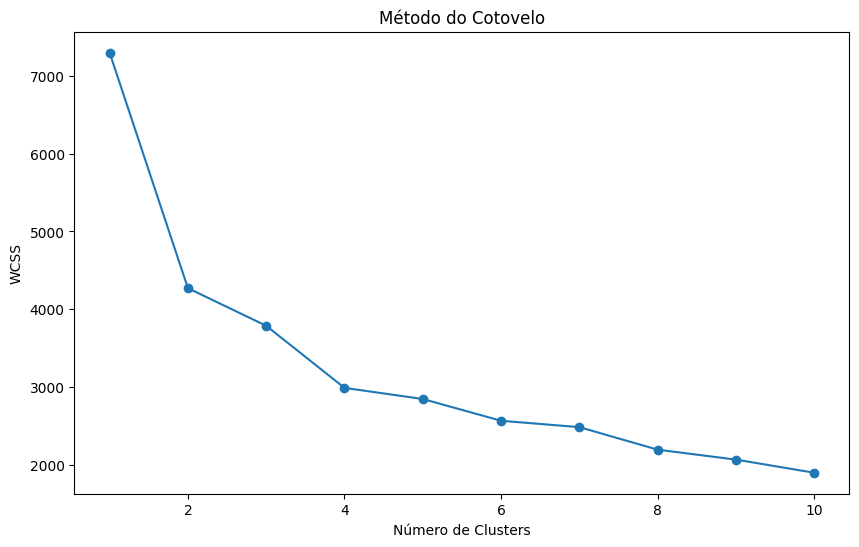

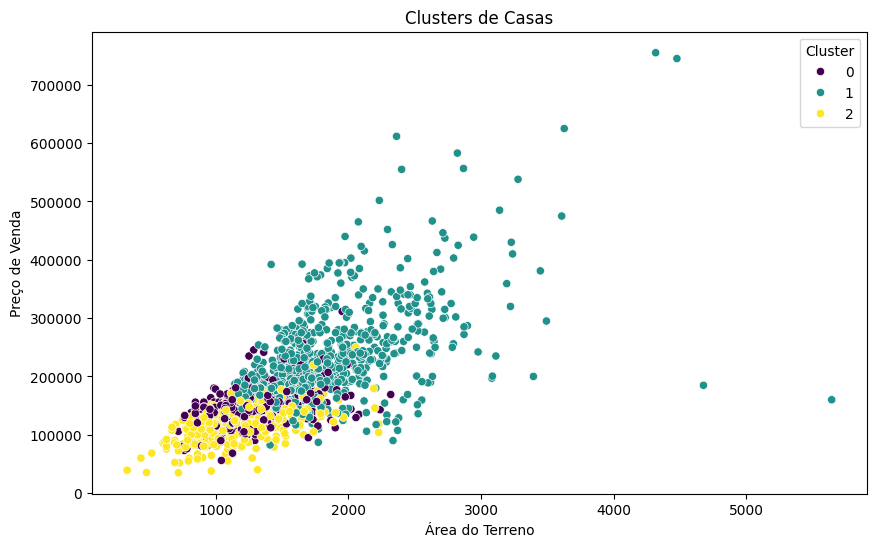

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar algumas características relevantes para a clusterização
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
X = train_data[features].dropna()

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Treinar o modelo K-Means com o número ideal de clusters (vamos supor 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar a coluna de clusters ao DataFrame original
train_data['Cluster'] = pd.Series(clusters, index=X.index)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Cluster', data=train_data, palette='viridis')
plt.title('Clusters de Casas')
plt.xlabel('Área do Terreno')
plt.ylabel('Preço de Venda')
plt.show()


# Redução de Dimensionalidade

Usamos a técnica PCA para reduzir a dimensionalidade dos dados e visualizá-los em um espaço de menor dimensão, facilitando a visualização dos clusters.

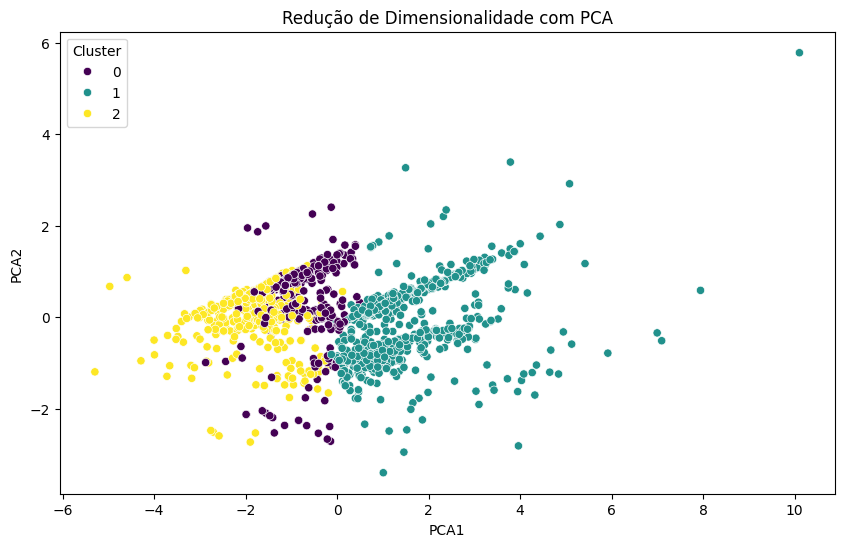

In [21]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adicionar os componentes principais ao DataFrame original
train_data['PCA1'] = X_pca[:, 0]
train_data['PCA2'] = X_pca[:, 1]

# Visualizar os dados em 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=train_data, palette='viridis')
plt.title('Redução de Dimensionalidade com PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Análise de Associação

Usamos o algoritmo Apriori para identificar associações entre as características das casas.

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

# Binarizar as características baseadas na mediana
data_bin = train_data[features_bin].copy()
for feature in features:
    median_value = data_bin[feature].median()
    data_bin[feature] = (data_bin[feature] > median_value).astype(int)

# Aplicar o algoritmo Apriori
frequent_itemsets = apriori(data_bin, min_support=0.1, use_colnames=True)

# Gerar as regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Visualizar as regras de associação
print(rules.head())


     antecedents    consequents  antecedent support  consequent support  \
0    (GrLivArea)  (OverallQual)            0.499315            0.375342   
1  (OverallQual)    (GrLivArea)            0.375342            0.499315   
2   (GarageCars)  (OverallQual)            0.127397            0.375342   
3  (OverallQual)   (GarageCars)            0.375342            0.127397   
4  (TotalBsmtSF)  (OverallQual)            0.500000            0.375342   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.299315    0.599451  1.597078  0.111901    1.559505       0.746690  
1  0.299315    0.797445  1.597078  0.111901    2.471850       0.598499  
2  0.117123    0.919355  2.449376  0.069306    7.745753       0.678124  
3  0.117123    0.312044  2.449376  0.069306    1.268399       0.947291  
4  0.263014    0.526027  1.401460  0.075342    1.317919       0.572917  


c:\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Análise de Outlier

Utilizamos o algoritmo Local Outlier Factor (LOF) para identificar casas que podem ser consideradas outliers.

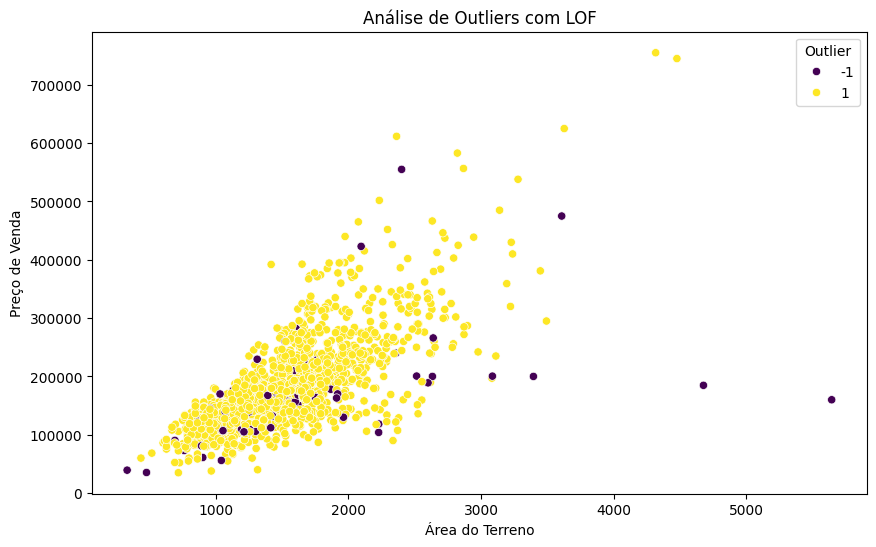

In [26]:
from sklearn.neighbors import LocalOutlierFactor

# Treinar o modelo LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
train_data['Outlier'] = lof.fit_predict(X_scaled)

# Visualizar os outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Outlier', data=train_data, palette='viridis')
plt.title('Análise de Outliers com LOF')
plt.xlabel('Área do Terreno')
plt.ylabel('Preço de Venda')
plt.show()


# Conclusão

Através dessas análises, conseguimos identificar as características mais relevantes para a previsão dos preços de venda das casas, construir modelos preditivos e identificar padrões interessantes nos dados. Este processo de EDA e modelagem é essencial para compreender melhor os dados e tomar decisões informadas no desenvolvimento de modelos de machine learning.